In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_json('https://www.mohfw.gov.in/data/datanew.json')
data.head()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,7,5038,4969,62,8,5039,4969,62,35
1,1,Andhra Pradesh,2083,893366,884094,7189,2188,893734,884357,7189,28
2,3,Arunachal Pradesh,3,16842,16783,56,3,16842,16783,56,12
3,4,Assam,1650,217951,215201,1100,1663,217976,215213,1100,18
4,5,Bihar,473,263443,261413,1557,523,263569,261487,1559,10


### Data Exploration

In [3]:
data.shape

(37, 11)

In [4]:
data.isnull().sum()

sno             0
state_name      0
active          0
positive        0
cured           0
death           0
new_active      0
new_positive    0
new_cured       0
new_death       0
state_code      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sno           37 non-null     int64 
 1   state_name    37 non-null     object
 2   active        37 non-null     int64 
 3   positive      37 non-null     int64 
 4   cured         37 non-null     int64 
 5   death         37 non-null     int64 
 6   new_active    37 non-null     int64 
 7   new_positive  37 non-null     int64 
 8   new_cured     37 non-null     int64 
 9   new_death     37 non-null     int64 
 10  state_code    37 non-null     object
dtypes: int64(9), object(2)
memory usage: 3.3+ KB


In [6]:
data.describe().T
# Viewing the descriptive statistics of the data like mean, std deviation, min and max values present in the dataset

,count,mean,std,min,25%,50%,75%,max
sno,37.0,319.054054,1.823499e+03,1.0,11.0,20.0,29.0,11111.0
active,37.0,16707.405405,5.858957e+04,2.0,73.0,1199.0,4830.0,309087.0
positive,37.0,626980.000000,1.912554e+06,648.0,24220.0,210466.0,338719.0,11599130.0
cured,37.0,601637.189189,1.831651e+06,511.0,22142.0,187198.0,336066.0,11130288.0
death,37.0,8635.405405,2.708999e+04,1.0,361.0,1669.0,4482.0,159755.0
new_active,37.0,18088.972973,6.369827e+04,2.0,74.0,1290.0,5355.0,334646.0
new_positive,37.0,629517.891892,1.920823e+06,666.0,24459.0,213110.0,338817.0,11646081.0
new_cured,37.0,602782.054054,1.835308e+06,536.0,22225.0,188529.0,336124.0,11151468.0
new_death,37.0,8646.864865,2.712704e+04,1.0,362.0,1671.0,4495.0,159967.0


In [7]:
data = data.iloc[:36]

In [8]:
data.head()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,7,5038,4969,62,8,5039,4969,62,35
1,1,Andhra Pradesh,2083,893366,884094,7189,2188,893734,884357,7189,28
2,3,Arunachal Pradesh,3,16842,16783,56,3,16842,16783,56,12
3,4,Assam,1650,217951,215201,1100,1663,217976,215213,1100,18
4,5,Bihar,473,263443,261413,1557,523,263569,261487,1559,10


In [9]:
# The total number of active cases in India
data['active'].sum(axis = 0) 

309087

In [10]:
# The total number of positive cases in India
data['positive'].sum(axis = 0) 

11599130

In [11]:
# The total number of cured cases in India
data['cured'].sum(axis = 0)

11130288

In [12]:
# The total number of deaths in India
data['death'].sum(axis = 0)

159755

In [13]:
# The total number of new active cases
data['new_active'].sum(axis = 0)

334646

In [14]:
# The total number of new positive cases
data['new_positive'].sum(axis = 0)

11646081

In [15]:
# The total number of new cured cases
data['new_cured'].sum(axis = 0)

11151468

In [16]:
# The total number of new death cases
data['new_death'].sum(axis = 0)

159967

### Data Visualization 

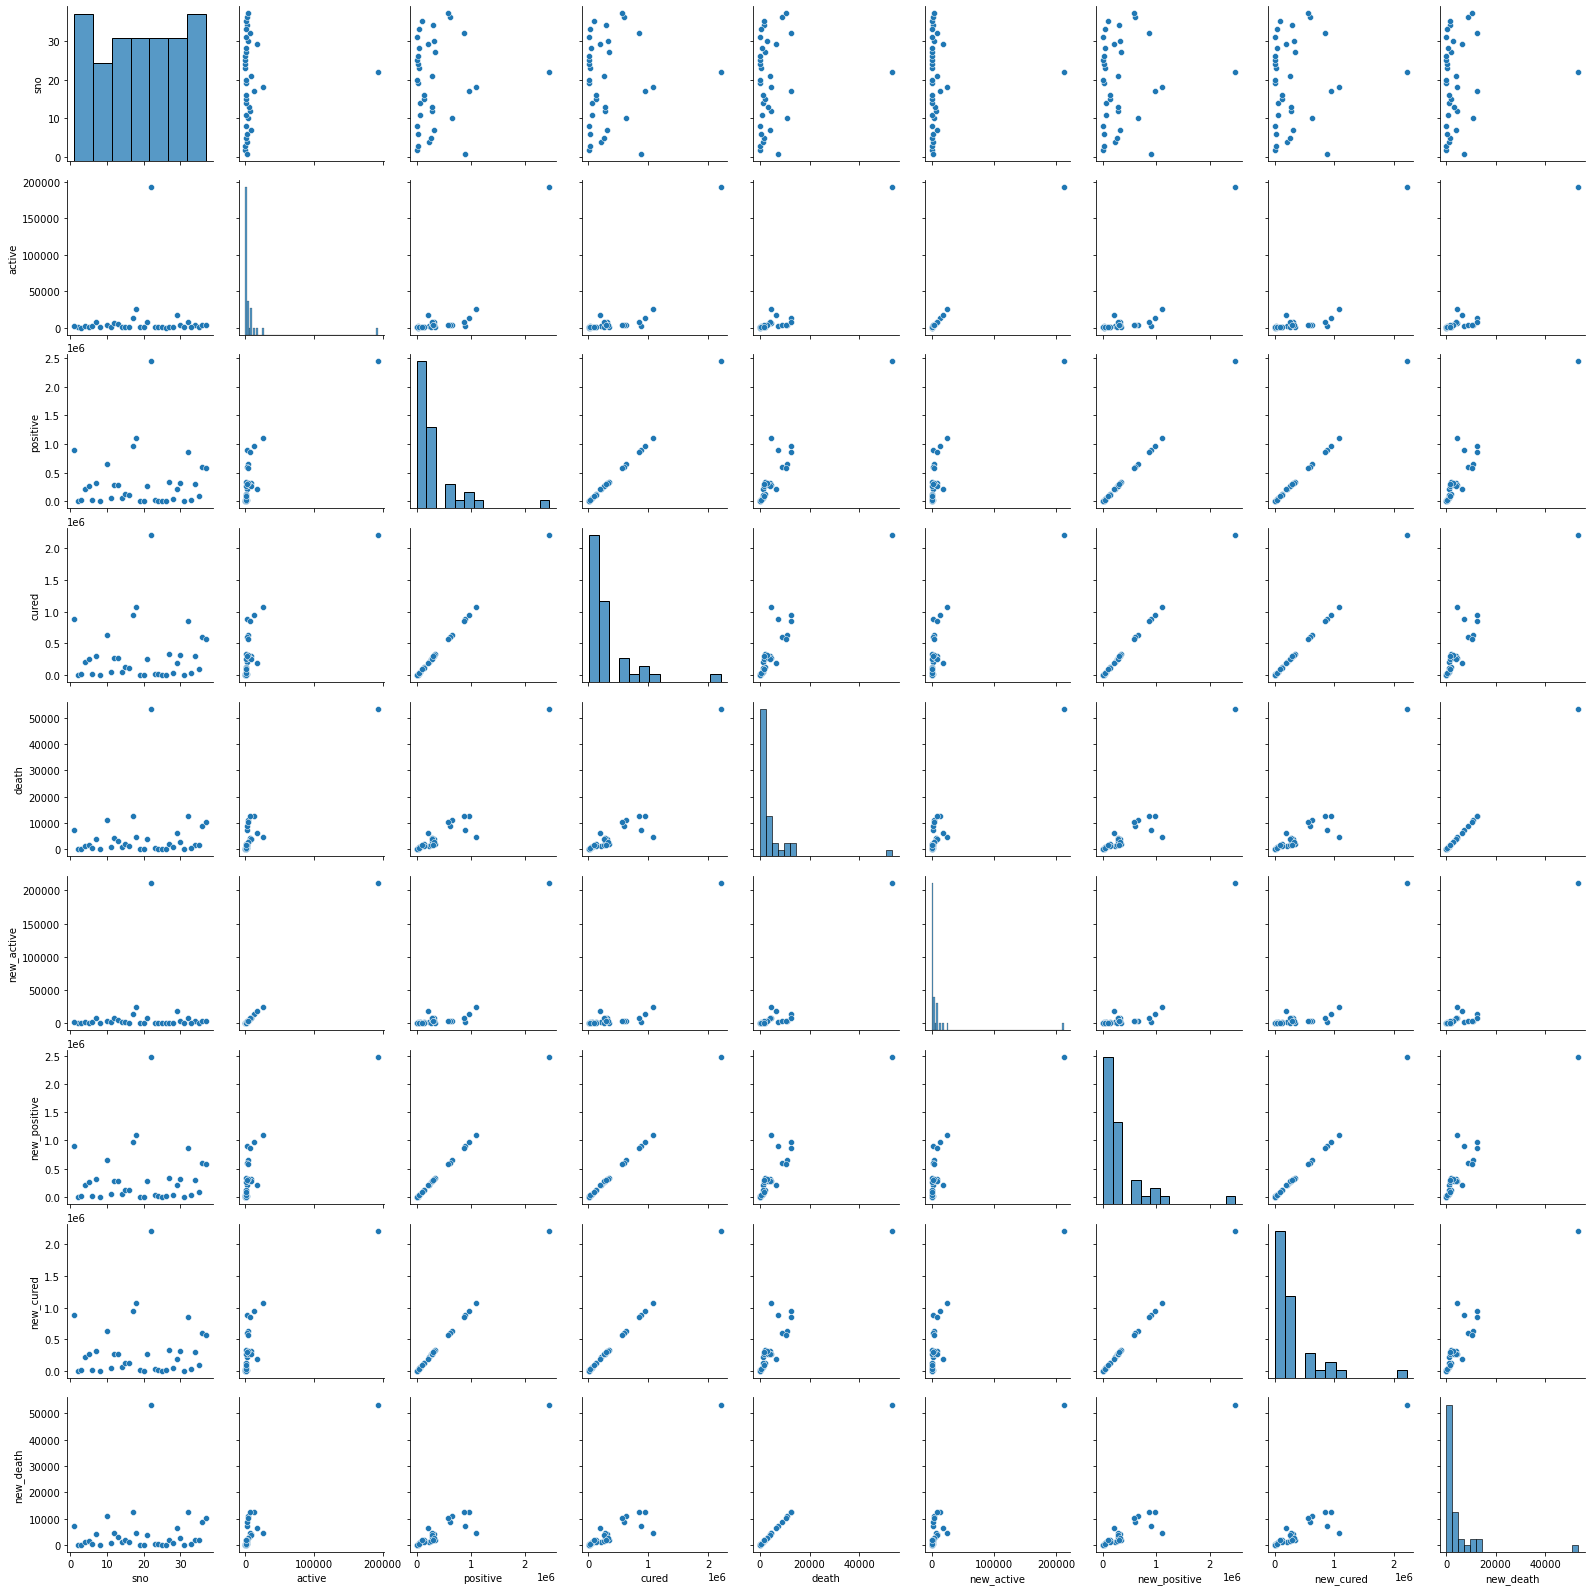

In [17]:
sns.pairplot(data=data)
plt.show()

In [18]:
# Storing total cases
cases_data=data.sum()


In [19]:
cases_data.drop(['sno','state_name','state_code'],inplace=True)
cases_data

active            309087
positive        11599130
cured           11130288
death             159755
new_active        334646
new_positive    11646081
new_cured       11151468
new_death         159967
dtype: object

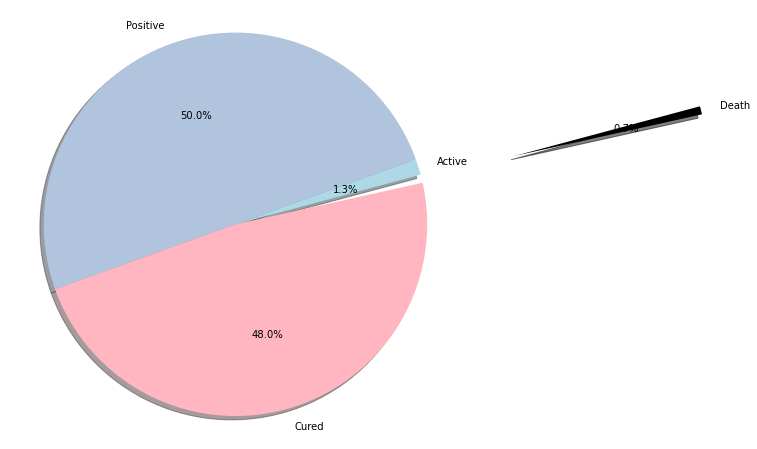

In [20]:
# Pie chart visualization
my_data = cases_data.iloc[:4].values
my_labels = 'Active','Positive','Cured','Death'
my_explode = (0,0,0,1.5)
my_colors = ['lightblue','lightsteelblue','lightpink','black']
fig1, ax1 = plt.subplots(figsize=(13, 8))
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.axis('equal')
plt.show()

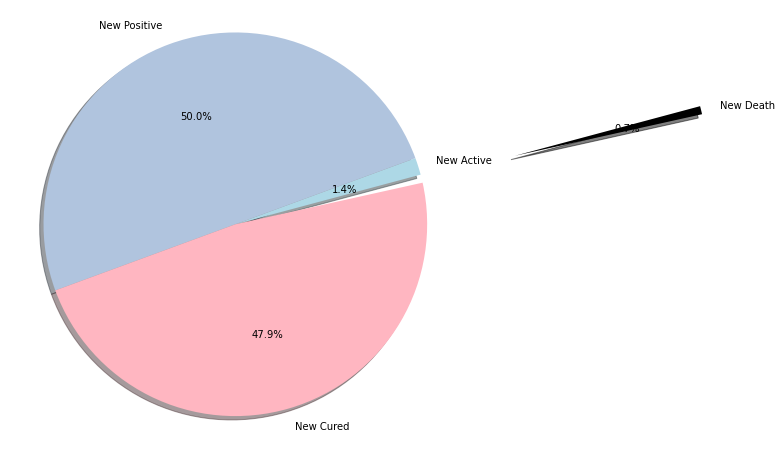

In [21]:
my_data = cases_data.iloc[4:9].values
my_labels = ['New Active','New Positive','New Cured','New Death']
my_explode = (0,0,0,1.5)
my_colors = ['lightblue','lightsteelblue','lightpink','black']
fig1, ax1 = plt.subplots(figsize=(13, 8))
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.axis('equal')
plt.show()

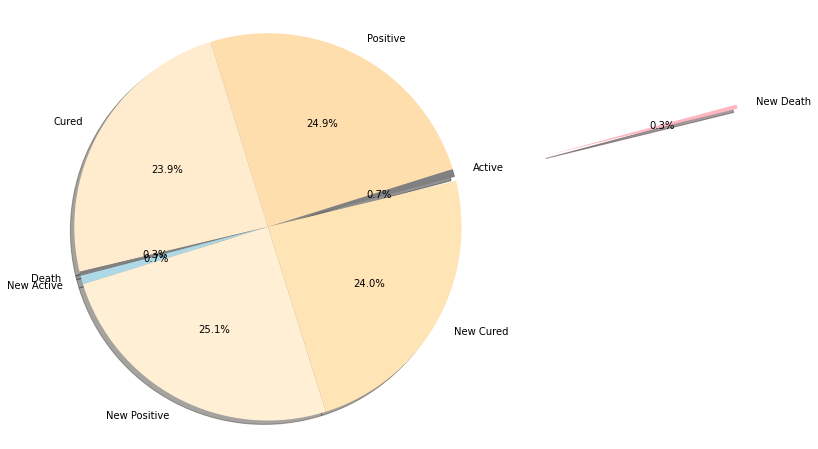

In [22]:
my_data = cases_data.iloc[:9].values
my_labels = 'Active','Positive','Cured','Death','New Active','New Positive','New Cured','New Death'
my_explode = (0,0,0,0,0,0,0,1.5)
my_colors = ['gray','navajowhite','blanchedalmond','grey','lightblue','papayawhip','moccasin','lightpink']
fig1, ax1 = plt.subplots(figsize=(13, 8))
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.axis('equal')
plt.show()


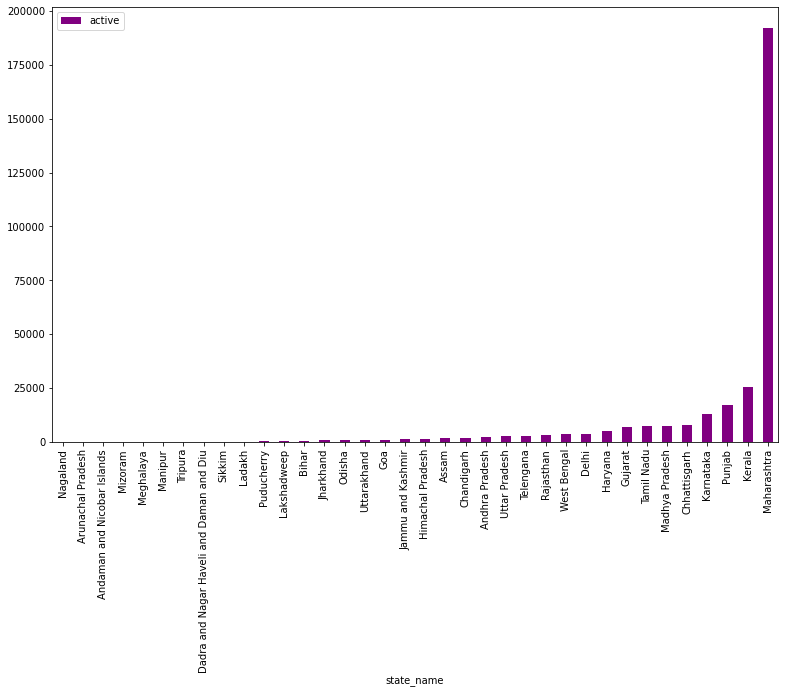

In [23]:
plt.rcParams['figure.figsize']=(13,8)
data[['state_name','active']].groupby(["state_name"]).mean().sort_values(by='active').plot.bar(color='purple')
plt.show()

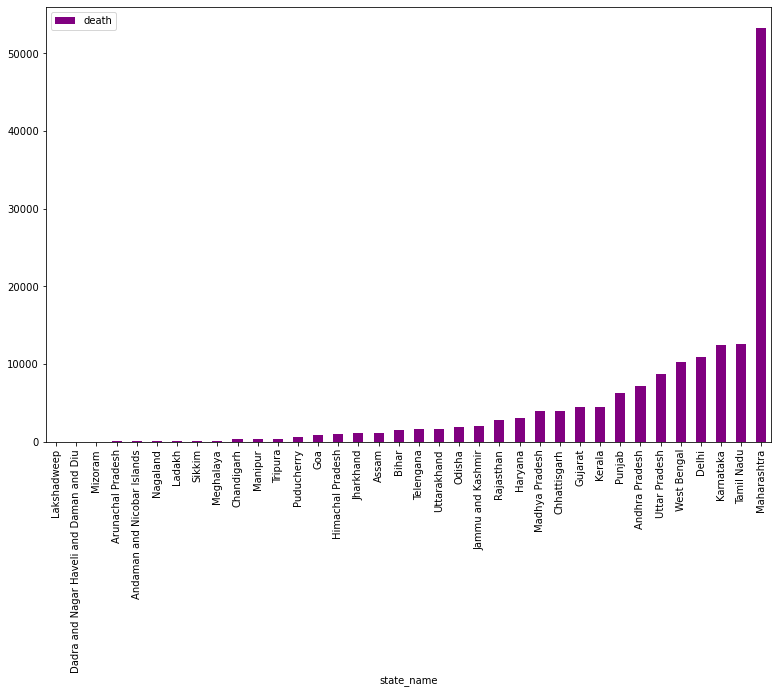

In [24]:
data[['state_name','death']].groupby(["state_name"]).mean().sort_values(by='death').plot.bar(color='purple')
plt.show()

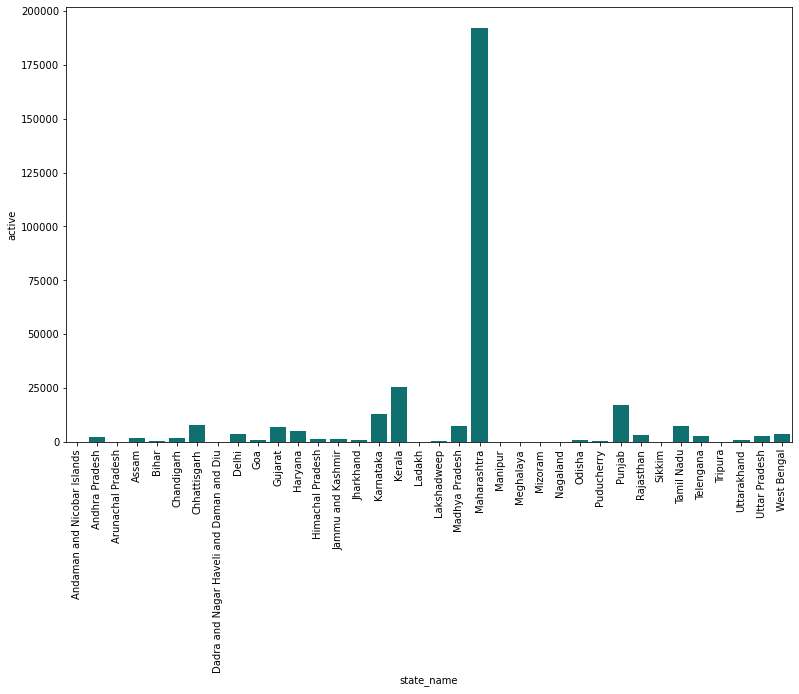

In [25]:
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90)
sns.barplot(x='state_name',y='active',color='teal',data=data);

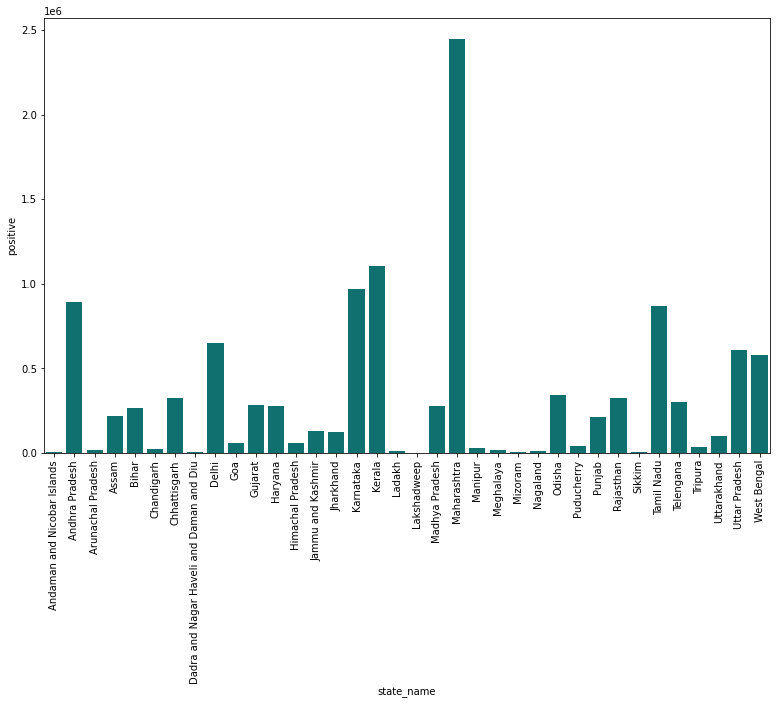

In [26]:
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90)
sns.barplot(x='state_name',y='positive',color='teal',data=data);
plt.show()

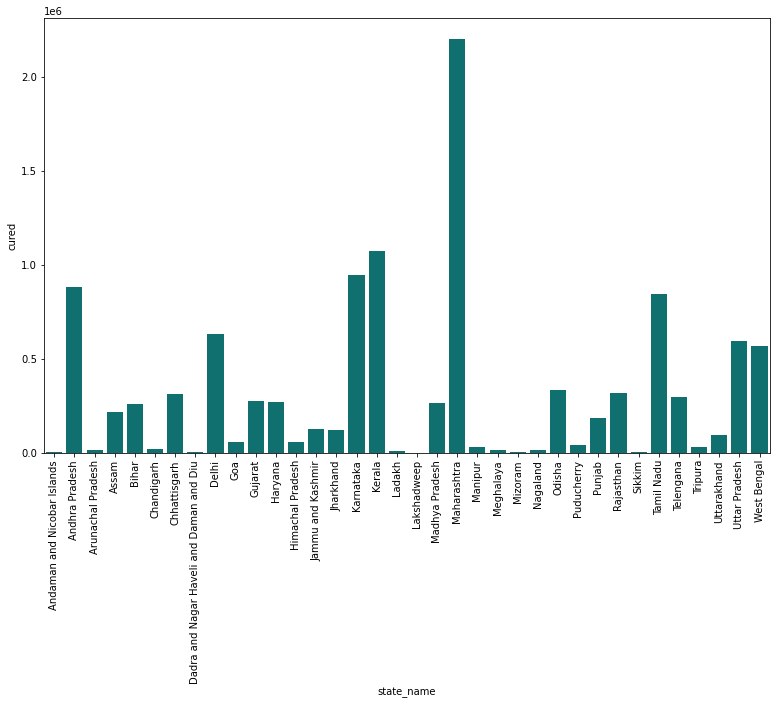

In [27]:
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90)
sns.barplot(x='state_name',y='cured',color='teal',data=data);

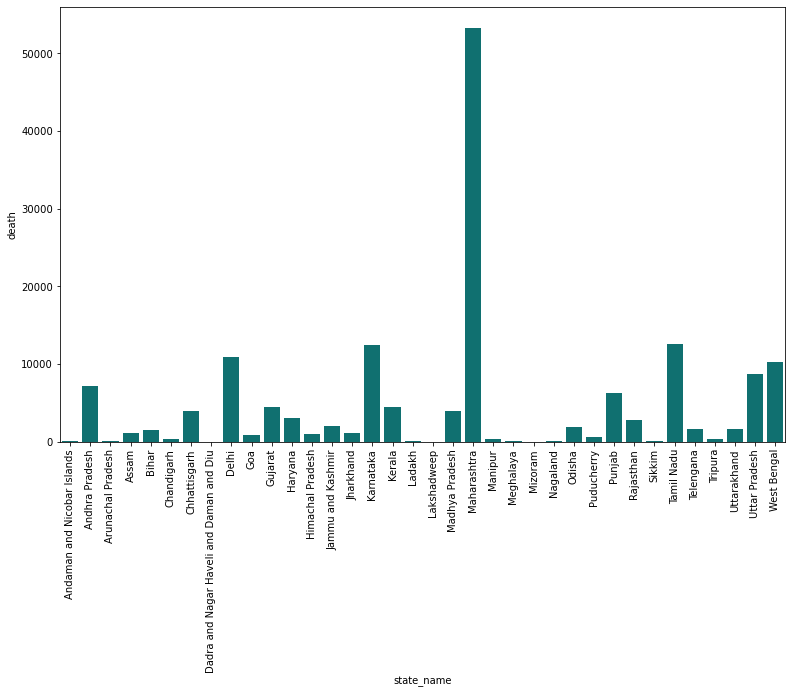

In [28]:
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90)
sns.barplot(x='state_name',y='death',color='teal',data=data);

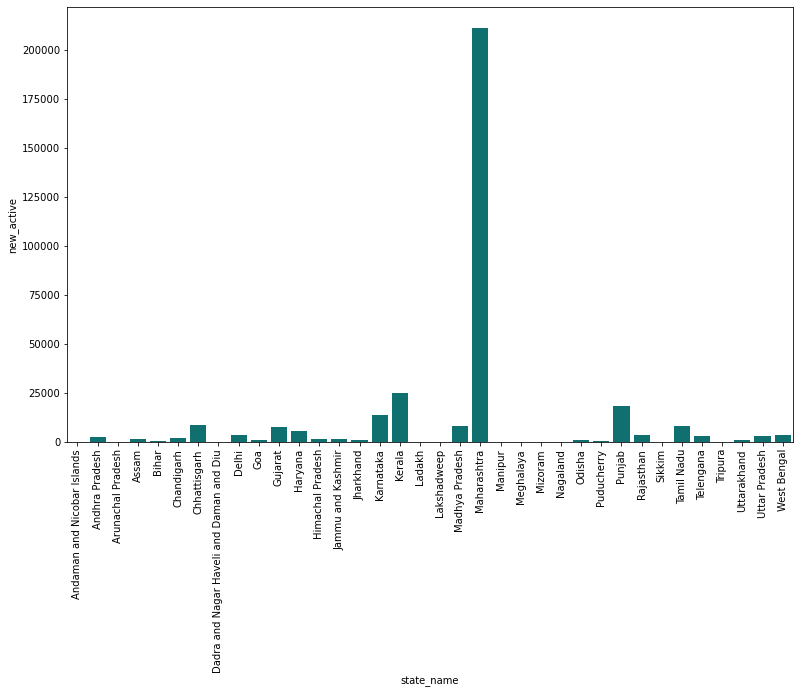

In [29]:
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90)
sns.barplot(x='state_name',y='new_active',color='teal',data=data);

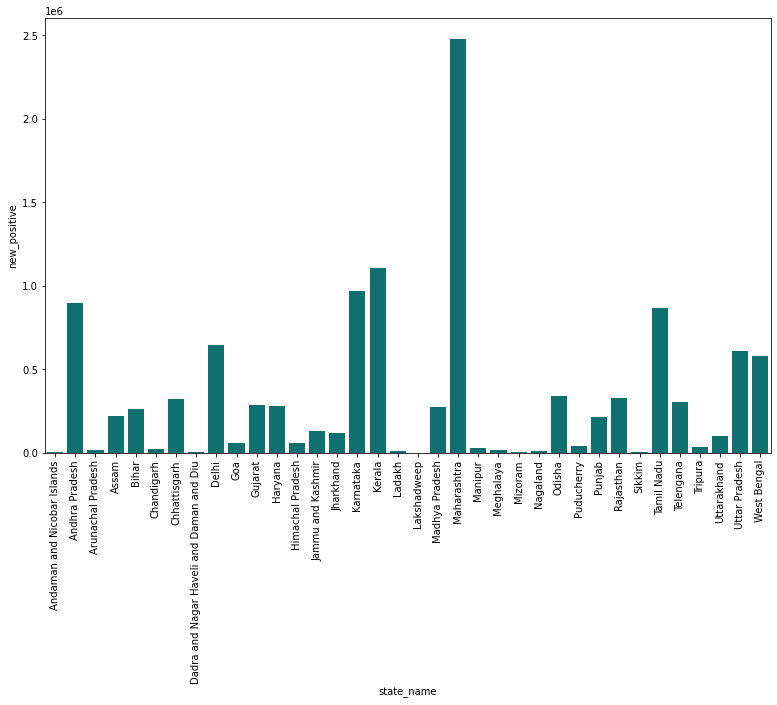

In [30]:
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90)
sns.barplot(x='state_name',y='new_positive',color='teal',data=data);

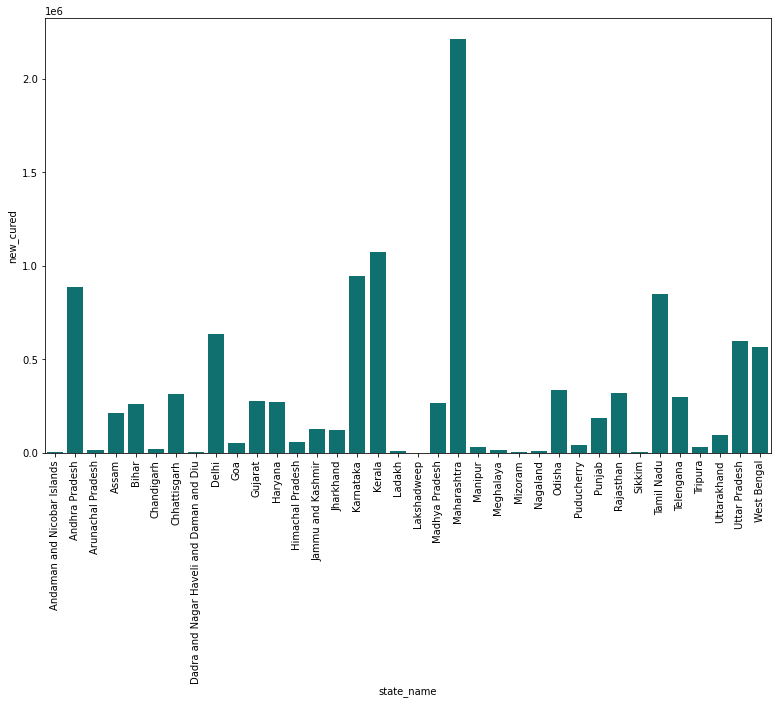

In [31]:
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90)
sns.barplot(x='state_name',y='new_cured',color='teal',data=data);

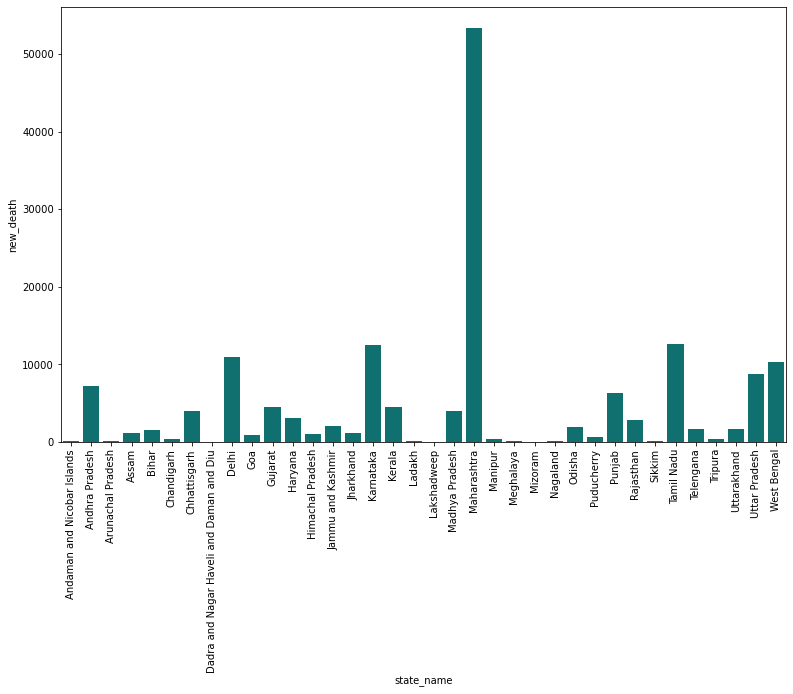

In [32]:
plt.figure(figsize=(13, 8))
plt.xticks(rotation=90)
sns.barplot(x='state_name',y='new_death',color='teal',data=data);

In [33]:
data.drop(['sno','state_code'],axis=1,inplace=True)

In [34]:
data.head(5)

,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death
0,Andaman and Nicobar Islands,7,5038,4969,62,8,5039,4969,62
1,Andhra Pradesh,2083,893366,884094,7189,2188,893734,884357,7189
2,Arunachal Pradesh,3,16842,16783,56,3,16842,16783,56
3,Assam,1650,217951,215201,1100,1663,217976,215213,1100
4,Bihar,473,263443,261413,1557,523,263569,261487,1559


In [35]:
data = data.set_index('state_name')

In [36]:
data.head()

,active,positive,cured,death,new_active,new_positive,new_cured,new_death
state_name,,,,,,,,
Andaman and Nicobar Islands,7,5038,4969,62,8,5039,4969,62
Andhra Pradesh,2083,893366,884094,7189,2188,893734,884357,7189
Arunachal Pradesh,3,16842,16783,56,3,16842,16783,56
Assam,1650,217951,215201,1100,1663,217976,215213,1100
Bihar,473,263443,261413,1557,523,263569,261487,1559


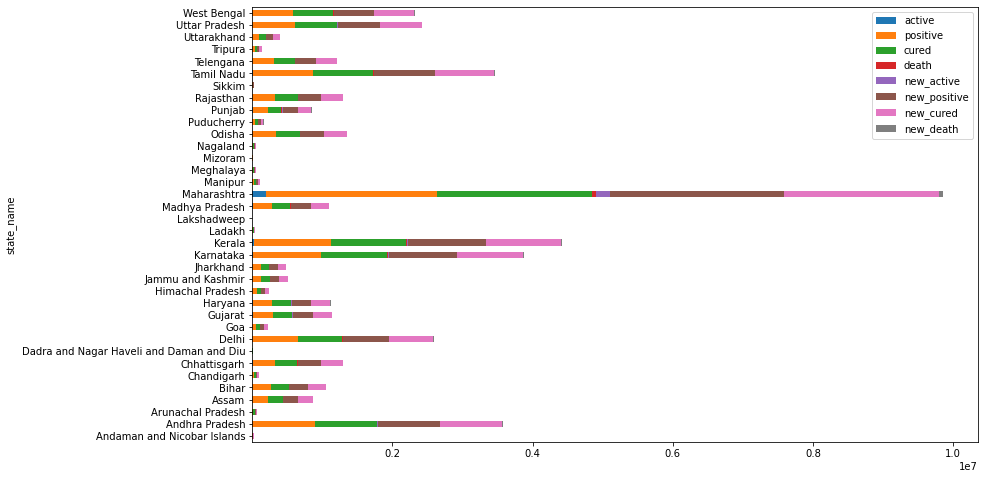

In [37]:
# Stacked bar plot
data.plot.barh(stacked=True,figsize=(13,8));

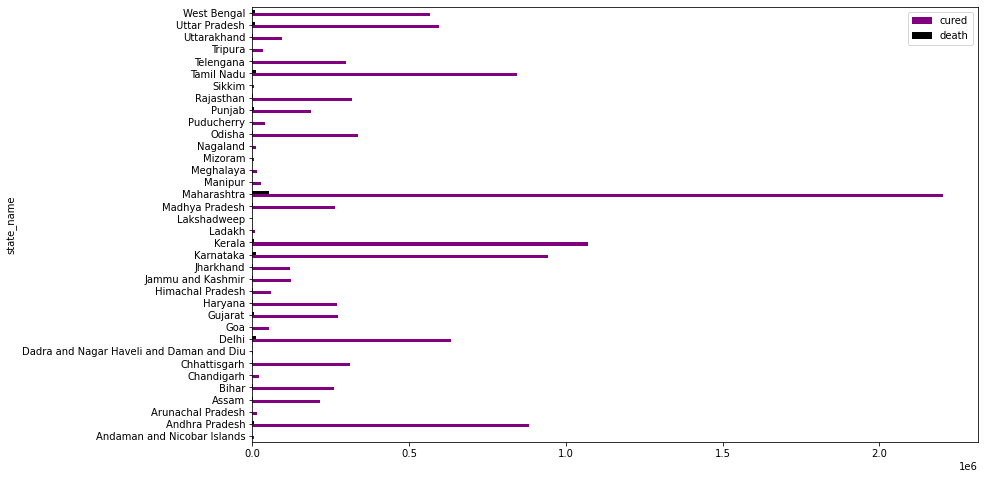

In [38]:
# bar plot for cured and death
df=data[['cured', 'death']] 
df.plot.barh(color={"cured": "purple", "death": "black"},figsize=(13,8));

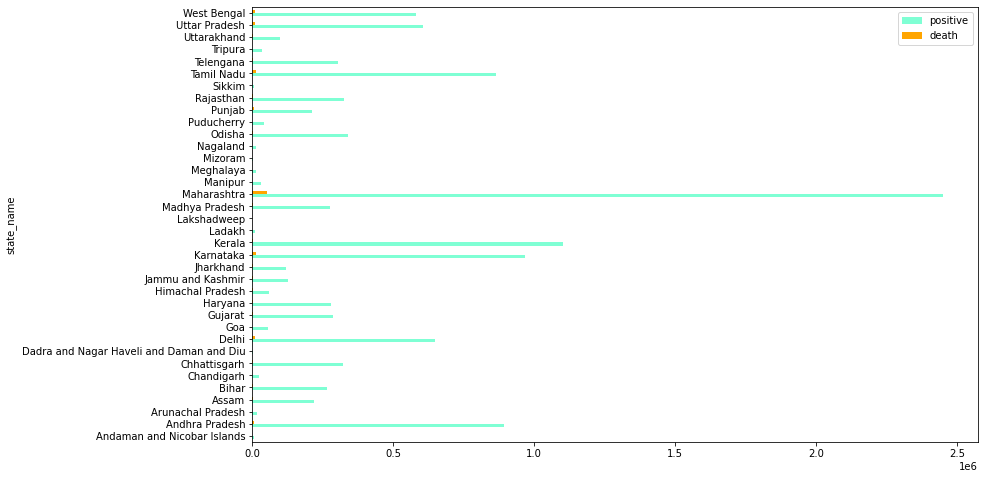

In [39]:
# bar plot for positive cases and death rate
df2=data[['positive', 'death']] 
df2.plot.barh(color={"positive": "aquamarine", "death": "orange"},figsize=(13,8));

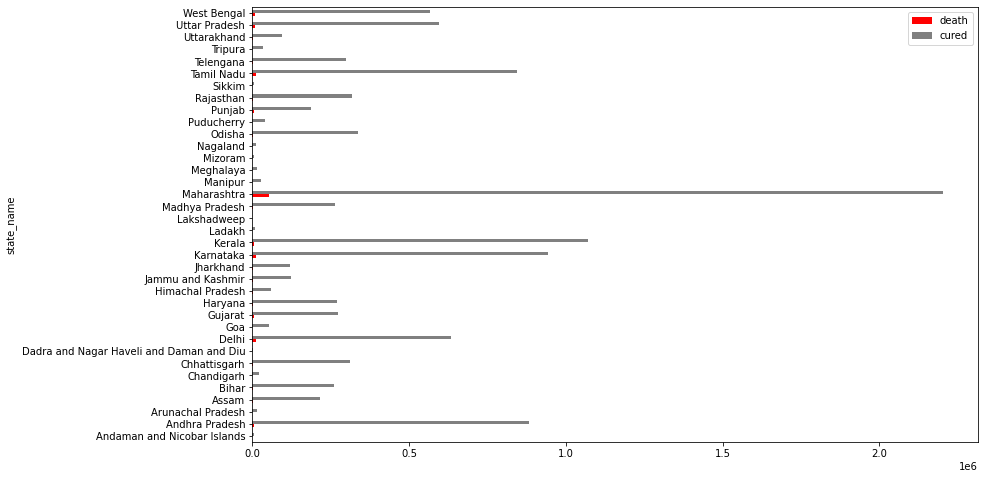

In [40]:
# barplot for death cases and cured cases
df3=data[['death', 'cured']] 
df3.plot.barh(color={"death": "red", "cured": "grey"},figsize=(13,8));

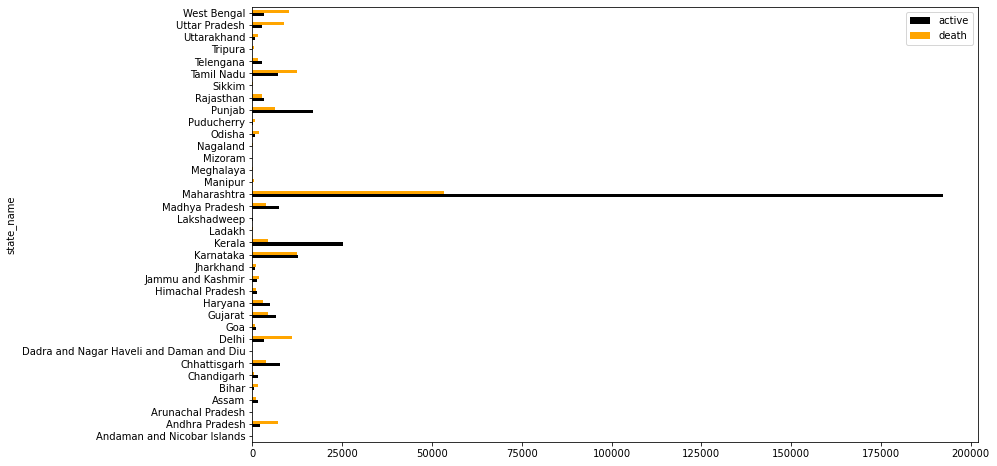

In [41]:
# bar plot for active and death cases
df4=data[['active', 'death']] 
df4.plot.barh(color={"active": "black", "death": "orange"},figsize=(13,8));